## GradientBoostingClassifier Algorithem 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load the CSV dataset

Data = pd.read_csv('DRUG.csv', usecols=['review','rating'])
Data.head()

,review,rating
0,"""i have used restasis for about a year now and...",2.0
1,"""my experience has been somewhat mixed. i have...",7.0
2,"""this is my second implanon would not recommen...",1.0
3,"""i recommend taking as prescribed, and the bot...",10.0
4,"""i have been on ampyra for 5 days and have bee...",9.0


In [3]:
Data.tail()

,review,rating
110806,"""i had tried many medications to level out my ...",8.0
110807,"""had partial thyroid removal with benign tumor...",7.0
110808,"""my experience with risperdal started when i f...",8.0
110809,"""my elderly dad was prescribed a low dose of a...",1.0
110810,"""latuda has been a hero in my battle against s...",10.0


In [4]:
Data['rating'].value_counts()

10.0    34255
9.0     19407
1.0     14286
8.0     13305
7.0      6671
5.0      5711
2.0      4776
3.0      4540
6.0      4359
4.0      3501
Name: rating, dtype: int64

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [7]:
# Step 2: Data Preprocessing

Data['review'] = Data['review'].apply(preprocess_text)

In [8]:
# Step 3: Feature Extraction (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x1 = tfidf_vectorizer.fit_transform(Data['review'])

In [9]:
# Assuming you have a column named 'label' containing the target labels

y1 = Data['rating']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)

print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({10.0: 34255, 9.0: 19407, 1.0: 14286, 8.0: 13305, 7.0: 6671, 5.0: 5711, 2.0: 4776, 3.0: 4540, 6.0: 4359, 4.0: 3501})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 34255, 7.0: 34255, 1.0: 34255, 10.0: 34255, 9.0: 34255, 8.0: 34255, 5.0: 34255, 3.0: 34255, 6.0: 34255, 4.0: 34255})


In [11]:
# Step 5: Splitting Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
# Step 6: Machine Learning Model (Naive Bayes)

RFC = GradientBoostingClassifier()

In [14]:
# Step 7: Training the Model

RFC.fit(x_train, y_train)

GradientBoostingClassifier()

In [15]:
# Step 8: Evaluation
predicted = RFC.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_test,predicted)

print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",AC*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 33.42139833600934


In [17]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_test,predicted)

print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",HL*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 66.57860166399065


In [18]:
from sklearn.metrics import classification_report

CL = classification_report(y_test,predicted)

print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',CL)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

         1.0       0.33      0.57      0.42      6939
         2.0       0.39      0.34      0.36      6881
         3.0       0.42      0.31      0.36      6946
         4.0       0.38      0.36      0.37      6752
         5.0       0.34      0.25      0.28      6872
         6.0       0.38      0.25      0.30      6778
         7.0       0.35      0.24      0.28      6863
         8.0       0.24      0.32      0.28      6778
         9.0       0.26      0.24      0.25      6869
        10.0       0.33      0.46      0.38      6832

    accuracy                           0.33     68510
   macro avg       0.34      0.33      0.33     68510
weighted avg       0.34      0.33      0.33     68510



In [19]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,predicted)

print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[3974  625  377  394  262  217  155  290  240  405]
 [1526 2322  456  554  363  242  259  464  308  387]
 [1362  627 2159  571  446  347  243  507  303  381]
 [1078  487  424 2436  380  303  333  596  333  382]
 [ 949  481  491  601 1697  421  469  819  422  522]
 [ 729  410  352  516  487 1706  485 1028  486  579]
 [ 641  299  298  485  502  396 1614 1175  686  767]
 [ 554  273  201  346  378  354  468 2186  914 1104]
 [ 479  207  184  333  289  298  377 1176 1664 1862]
 [ 643  181  160  233  239  166  243  813 1015 3139]]


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[3974  625  377  394  262  217  155  290  240  405]
 [1526 2322  456  554  363  242  259  464  308  387]
 [1362  627 2159  571  446  347  243  507  303  381]
 [1078  487  424 2436  380  303  333  596  333  382]
 [ 949  481  491  601 1697  421  469  819  422  522]
 [ 729  410  352  516  487 1706  485 1028  486  579]
 [ 641  299  298  485  502  396 1614 1175  686  767]
 [ 554  273  201  346  378  354  468 2186  914 1104]
 [ 479  207  184  333  289  298  377 1176 1664 1862]
 [ 643  181  160  233  239  166  243  813 1015 3139]]


DISPLAY CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER: 




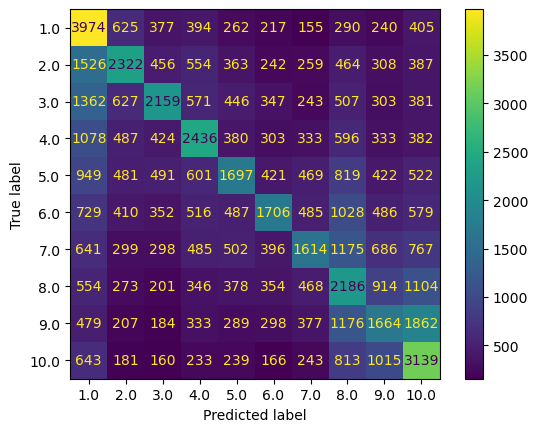

In [20]:
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER: \n\n")

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()


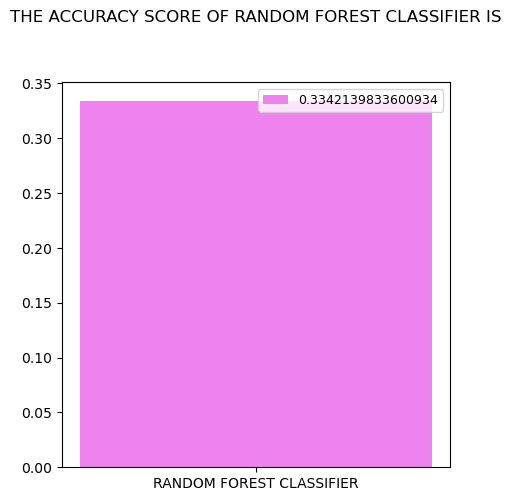

In [21]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("VIOLET"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [22]:
import joblib
joblib.dump(RFC, 'MODEL.pkl')

['MODEL.pkl']